In [1]:
import pandas as pd

df = pd.read_parquet('yelp_academic_dataset_business_cleaned.parquet')

df.to_csv('yelp_academic_dataset_business_cleaned.csv', index=False)

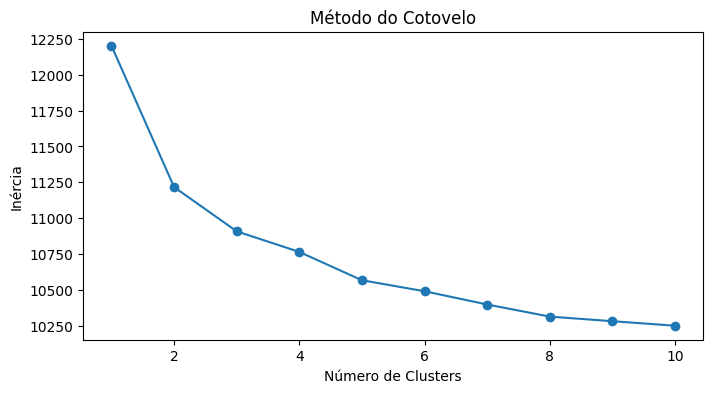

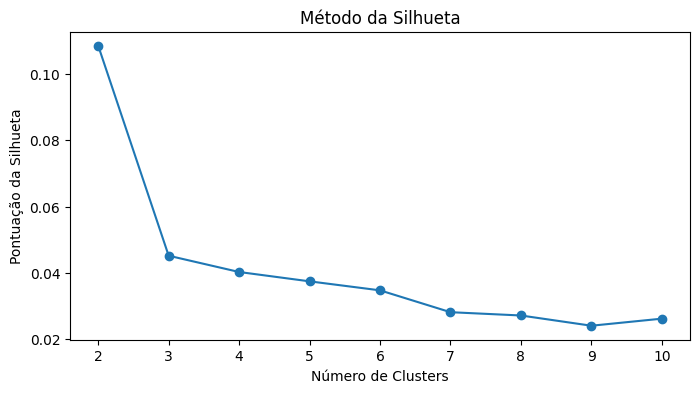

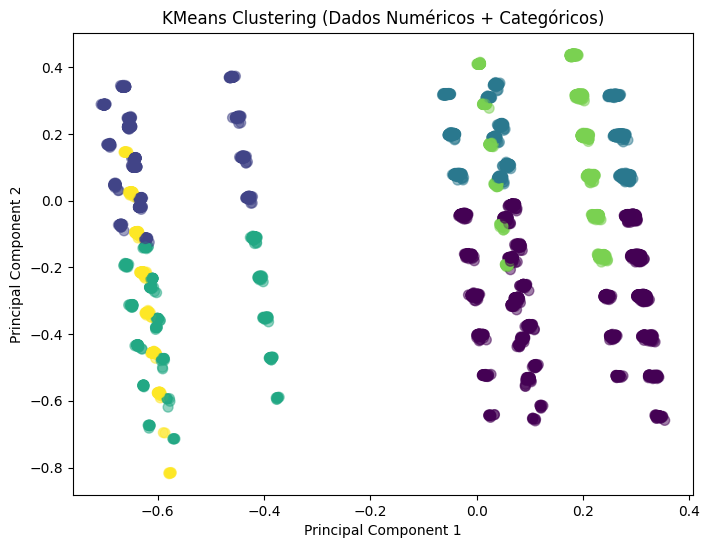

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA  
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('yelp_academic_dataset_business_cleaned.csv')

# Reduzir o número de amostras para 10.000
sampled_df = df.sample(n=10000, random_state=2)

# Selecionar as colunas relevantes para a clusterização
columns = ['stars', 'review_count', 'latitude', 'longitude', 'categories']
sampled_df = sampled_df[columns]

# Tratamento de dados categóricos e numéricos
numeric_features = ['stars', 'review_count', 'latitude', 'longitude']
categorical_features = ['categories']

# Transformador para dados numéricos (normalização)
numeric_transformer = MinMaxScaler()

# Transformador para dados categóricos (One-Hot Encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar um pipeline de transformação
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar a transformação
processed_data = preprocessor.fit_transform(sampled_df)

# clusterização - Método do Cotovelo
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=2)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# clusterização - Método da Silhueta
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=2)
    kmeans_labels = kmeans.fit_predict(processed_data)
    silhouette_scores.append(silhouette_score(processed_data, kmeans_labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta')
plt.show()

# clusterização 
kmeans_model = KMeans(n_clusters=6, random_state=2)

# Ajustar o modelo e obter as previsões
kmeans_result = kmeans_model.fit_predict(processed_data)

# Reduzir a dimensionalidade para 2D com PCA para o gráfico de dispersão
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)

# Plotar os clusters
plt.figure(figsize=(8, 6))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_result, cmap='viridis', s=50, alpha=0.5)

# Adicionar títulos e rótulos aos eixos
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (Dados Numéricos + Categóricos)')

# Exibir o gráfico
plt.show()
